In [2]:
from IPython.display import Markdown
# PART 3: Build a Multinomial Naive Bayes model to classify the gender of a Hollywood movie character based on their 
# dialogues in the movie.
Markdown('## PART 3: BUILDING MULTINOMIAL NAIVE BAYES MODEL \n ### This is a binary classification probelm with output as \
male or female. The input will typically be aggregation of all utterances of a unique movie character. As in the ML problem, \
the optimizer accepts numerical values only, all other values should be converted to numerical data types before applying \
for model training. We shall learn *MultinomialNB and CountVectorizer classes*.')

## PART 3: BUILDING MULTINOMIAL NAIVE BAYES MODEL 
 ### This is a binary classification probelm with output as male or female. The input will typically be aggregation of all utterances of a unique movie character. As in the ML problem, the optimizer accepts numerical values only, all other values should be converted to numerical data types before applying for model training. We shall learn *MultinomialNB and CountVectorizer classes*.

In [68]:
import pandas as pd
df_mov_chr_gender = pd.read_csv('mov_chr_fld_mMfF.tsv',sep='\t')
df_mov_utterance = pd.read_csv('mov_line.tsv',sep='\t')

In [64]:
print('We have used read_csv method of pandas library to load a csv file into dataframe.')

We have used read_csv method of pandas library to load a csv file into dataframe.


In [20]:
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender
0,u0,m0,10 things i hate about you,f
1,u2,m0,10 things i hate about you,m
2,u4,m0,10 things i hate about you,m
3,u5,m0,10 things i hate about you,f
4,u6,m0,10 things i hate about you,f


In [66]:
print('The head() function of a dataframe displays top 5 rows. However, one can pass any number as per the requirement.')

The head() function of a dataframe displays top 5 rows. However, one can pass any number as per the requirement.


In [21]:
df_mov_utterance.head()

,utteranceID,characterID,movieID,utterance
0,L1045,u0,m0,They do not!
1,L1044,u2,m0,They do to!
2,L985,u0,m0,I hope so.
3,L984,u2,m0,She okay?
4,L925,u0,m0,Let's go.


In [69]:
df_mov_chr_gender['gender_binary'] = df_mov_chr_gender['gender'].apply(lambda x: 1 if x in ['f','F'] else 0)
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender,gender_binary
0,u0,m0,10 things i hate about you,f,1
1,u2,m0,10 things i hate about you,m,0
2,u4,m0,10 things i hate about you,m,0
3,u5,m0,10 things i hate about you,f,1
4,u6,m0,10 things i hate about you,f,1


In [71]:
print('The lambda() function typically takes one or more arguments and evaluates single expression to produce results.')

The lambda() function typically takes one or more arguments and evaluates single expression to produce results.


In [23]:
df_mov_chr_gender.drop(['gender'], axis=1, inplace=True)
df_mov_chr_gender.head()

,characterID,movieID,movie title,gender_binary
0,u0,m0,10 things i hate about you,1
1,u2,m0,10 things i hate about you,0
2,u4,m0,10 things i hate about you,0
3,u5,m0,10 things i hate about you,1
4,u6,m0,10 things i hate about you,1


In [73]:
print('We can typically drop one or more column(s) and retain the rest in a dataframe. \
To update the actual dataframe, we use inplace=True.')

We can typically drop one or more column(s) and retain the rest in a dataframe. To update the actual dataframe, we use inplace=True.


In [24]:
df_mov_utterance_gby_chrid = df_mov_utterance.groupby('characterID')
df_mov_utterance_gby_chrid

In [74]:
print('The groupby() function of a dataframe genrates an object as shown above. The unique column elements \
under groupby are grouped together as dictionary key and rest of the columns are clubbed together as value.')

The groupby() function of a dataframe genrates an object as shown above. The unique column elements under groupby are grouped together as dictionary key and rest of the columns are clubbed together as value.


In [26]:
lst_char_utter = []
character_ID = []
for chrid, df_mov_utterance_gby in df_mov_utterance_gby_chrid:
    if chrid in df_mov_chr_gender['characterID'].values:
        char_utter = ''
        for item in df_mov_utterance_gby['utterance']:
            char_utter += item
        lst_char_utter.append(char_utter)
        character_ID.append(chrid)
print(f'{len(lst_char_utter)} long list of character utterances for {len(character_ID)} long list of characters \
is ready with utterances feature. These utterences will be counter vectorized at a later stage.')

2951 long list of character utterances for 2951 long list of characters is ready with utterances feature. These utterences will be counter vectorized at a later stage.


In [28]:
import numpy as np
lstGender = []
for charID in character_ID:
    if charID in df_mov_chr_gender['characterID'].values:
        lstGender.extend(df_mov_chr_gender[df_mov_chr_gender['characterID']==charID]['gender_binary'].values)
y = np.array(lstGender)
len(y)

2951

In [31]:
X = np.array(lst_char_utter)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
print('The train_test_split() function of sklearn.model_selection takes dataframe column or list or array elements \
as X and y passing parameters.')

The train_test_split() function of sklearn.model_selection takes dataframe column or list or array elements as X and y passing parameters.


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
print('The CountVectorizer() class object of sklearn.feature_extraction.text module takes a arrayed corpus of words (need not\
be uniques) and returns a matrix of integer values with frequency encoding of word repetitions.')

The CountVectorizer() class object of sklearn.feature_extraction.text module takes a arrayed corpus of words (need notbe uniques) and returns a matrix of integer values with frequency encoding of word repetitions.


In [36]:
y[0:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [77]:
print('Even if the three popular Naive Bayes classification approachesa are Binomial, Multinomial and Gaussian, here \
we are using Multinomial Naive Bayes classification as the features have numbers other than 0 and 1 (due to frequency count.)')

Even if the three popular Naive Bayes classification approachesa are Binomial, Multinomial and Gaussian, here we are using Multinomial Naive Bayes classification as the features have numbers other than 0 and 1 (due to frequency count.)


In [78]:
print('We had Aggregate Utterance (AU) as the fetures. However, they are converted to matrix of numbers.')

We had Aggregate Utterance (AU) as the fetures. However, they are converted to matrix of numbers.


In [39]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.7360406091370558

In [80]:
print('Before testing the accuracy of the model using score() function, we need to transform corpus into numbers. This \
is done by using the function transform() of the CountVectorizer() class.')

Before testing the accuracy of the model using score() function, we need to transform corpus into numbers. This is done by using the function transform() of the CountVectorizer() class.


In [40]:
print('Alternatively, we can use the Pipeline class from sklearn.pipeline.')

Alternatively, we can use the Pipeline class from sklearn.pipeline.


In [41]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [42]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [43]:
clf.score(X_test, y_test)

0.7360406091370558

In [46]:
clf.predict(X_test[105:115]) # Random sample

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
y_test[105:115]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
print('Random sampling gives 100% accuracy. however, overall accuracy is 73.6%. ')

Random sampling gives 100% accuracy. however, overall accuracy is 73.6%. 


In [51]:
y_predicted_binary = clf.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix # confusion_matrix is used for data visualization
cm = confusion_matrix(y_test, y_predicted_binary)
cm

array([[355,  56],
       [100,  80]], dtype=int64)

Text(69.0, 0.5, 'True')

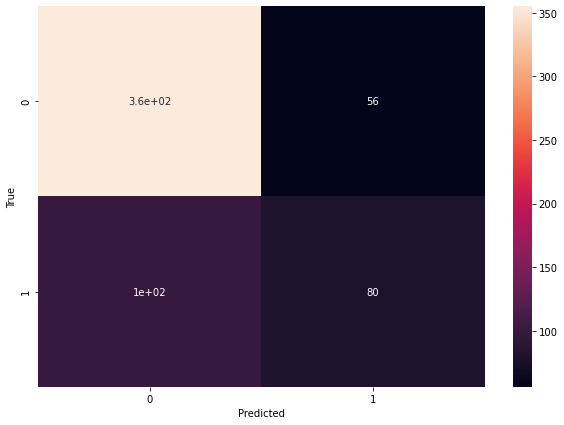

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn     # This along with confusion_matrix gives an interesting visualizing effect of true Vs predicted output
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [62]:
print('For Precision, Recall and F1 Score, one can refer to PART -2 of the project.')

For Precision, Recall and F1 Score, one can refer to PART -2 of the project.


In [63]:
Markdown('### [CLOSING of the project *MULTINOMIAL NAIVE BAYES CLASSIFICATION PROBLEM* of GENDER DETECTION from the \
DIALOGUE of a HOLLYWOOD MOVIE CHARACTER]')

### [CLOSING of the project *MULTINOMIAL NAIVE BAYES CLASSIFICATION PROBLEM* of GENDER DETECTION from the DIALOGUE of a HOLLYWOOD MOVIE CHARACTER]